Nome: Felipe Faustino Brito

Matrícula: 2021007366

# Transformada Rápida de Fourier e Algumas Aplicações

1) Escrever uma função Python para realizar a Soma de Convolução usando a FFT. Esta
função deve receber duas sequencias (variáveis ndarray) e devolver uma com o resultado da
convolução. Gerar duas sequencias/sinais curtos para testar o programa, comparando seu
resultado com o da função convolve do Numpy

In [2]:
import numpy as np

def convolution_fft(x, h):
    # Determinar o tamanho necessário do resultado
    n = len(x) + len(h) - 1
    
    # Realizar a FFT das duas sequências, com zero-padding para o comprimento n
    X = np.fft.fft(x, n)
    H = np.fft.fft(h, n)
    
    # Multiplicar as FFTs
    Y = X * H
    
    # Realizar a transformada inversa para obter a convolução no domínio do tempo
    y = np.fft.ifft(Y)
    
    # Retornar a parte real do resultado, pois a convolução de sequências reais deve ser real
    return np.real(y)

# Exemplo de uso
x = np.array([1, 2, 3])
h = np.array([0, 1, 0.5])
# Convolução usando a função criada com FFT
resultado_fft = convolution_fft(x, h)

# Convolução usando a função convolve do Numpy
resultado_convolve = np.convolve(x, h)


print("Resultado da convolução com FFT:", resultado_fft)
print("Resultado da convolução com np.convolve:", resultado_convolve)

Resultado da convolução com FFT: [-3.95516953e-17  1.00000000e+00  2.50000000e+00  4.00000000e+00
  1.50000000e+00]
Resultado da convolução com np.convolve: [0.  1.  2.5 4.  1.5]


2) Escrever uma função Python para realizar a STFT usando a FFT. Esta função deve receber
um sinal, sua frequência de amostragem e o tamanho da janela da STFT, e deve devolver
uma sequência com os intervalos de tempo, uma com as bandas de frequência e uma matriz
com a DFT dos segmentos/janelas onde cada coluna representa uma banda de frequência e
cada linha representa um intervalo de tempo. Usar as instruções abaixo para gerar um sinal
de teste para verificar o funcionamento de sua função.

In [3]:
import numpy as np
from scipy.signal import get_window

def stft(signal, fs, window_size, overlap=0.5, window_type='hann'):
    # Número de pontos para sobreposição
    step_size = int(window_size * (1 - overlap))
    
    # Calcular o número de segmentos (janelas)
    n_segments = int(np.ceil((len(signal) - window_size) / step_size)) + 1
    
    # Definir os intervalos de tempo
    time_intervals = np.arange(0, n_segments * step_size, step_size) / fs
    
    # Definir as bandas de frequência
    freq_bands = np.fft.fftfreq(window_size, d=1/fs)
    
    # Preparar a matriz para armazenar a DFT dos segmentos
    stft_matrix = np.zeros((n_segments, window_size), dtype=np.complex64)
    
    # Aplicar a STFT
    window = get_window(window_type, window_size)
    for i in range(n_segments):
        start = i * step_size
        end = start + window_size
        segment = signal[start:end]
        
        # Se o segmento for menor que a janela, fazer zero-padding
        if len(segment) < window_size:
            segment = np.pad(segment, (0, window_size - len(segment)), 'constant')
        
        # Aplicar a janela ao segmento
        windowed_segment = segment * window
        
        # Calcular a FFT do segmento com janela e armazenar na matriz STFT
        stft_matrix[i, :] = np.fft.fft(windowed_segment)
    
    return time_intervals, freq_bands, stft_matrix

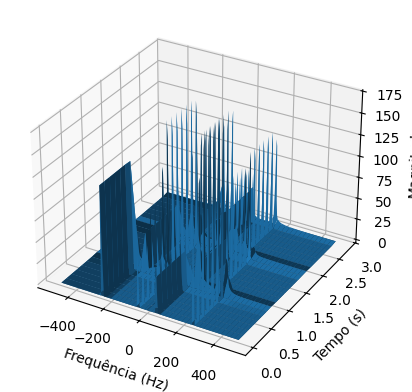

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Parâmetros e sinal de teste
Ts = 1/1000
t1 = np.arange(0, 1, Ts)
pi = np.pi
s1 = np.cos(2*pi*50*t1) + 2*np.cos(2*pi*250*t1)
s2 = 3*np.cos(2*pi*100*t1) + np.cos(2*pi*200*t1)
s3 = 2*np.cos(2*pi*150*t1) + np.cos(2*pi*20*t1)
s = np.append(s1, s2)
s = np.append(s, s3)
t = np.arange(0, 3, Ts)

# Executar a STFT
fs = 1/Ts  # Frequência de amostragem
window_size = 256  # Tamanho da janela
time_intervals, freq_bands, stft_matrix = stft(s, fs, window_size)

# Gerar gráfico 3D
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(freq_bands, time_intervals)
Z = np.abs(stft_matrix)
ax.plot_surface(X, Y, Z, linewidth=2)

# Adicionar rótulos aos eixos
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Tempo (s)')
ax.set_zlabel('Magnitude')

plt.show()

3) Utilizar a função criada no item 2, que realiza a STFT, para gerar o espectro de amplitude
do sinal DTMF selecionado do exercício 2 da atividade 4. Plotar o gráfico na forma de um
espectrograma, utilizando as instruções de geração de gráfico 3D.

In [12]:
with open('signals/DTMF-s6.npy', 'rb') as f:
    Ts2 = np.load(f)
    signal = np.load(f)

print(Ts2)
print(signal)

5e-05
[ 0.          0.15376819  0.12733197 ... -0.03464254  0.00977491
 -0.03644311]


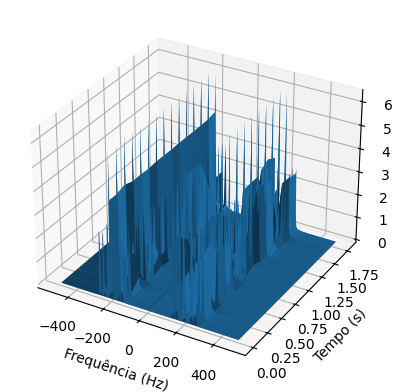

In [13]:
# Parâmetros e sinal de teste
Ts = 1/1000
# Executar a STFT
fs = 1/Ts  # Frequência de amostragem
window_size = 256  # Tamanho da janela
time_intervals, freq_bands, stft_matrix = stft(signal, fs, window_size)

# Gerar gráfico 3D
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(freq_bands, time_intervals)
Z = np.abs(stft_matrix)
ax.plot_surface(X, Y, Z, linewidth=2)

# Adicionar rótulos aos eixos
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Tempo (s)')
ax.set_zlabel('Magnitude')

plt.show()